In [33]:
# Default
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly 
import plotly.graph_objects as go
import seaborn as sns

# Data prepocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Tuning parameter
from sklearn.model_selection import GridSearchCV

# Model
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.neural_network import MLPClassifier

//# result
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


#retina
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


In [4]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

df = df.rename(columns={'NObeyesdad': 'result'})
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,result
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
print('Dataset consisting of ',df.shape[0],' observations')
print('Dataset consisting of ',df.shape[1],' columns')

Dataset consisting of  2111  observations
Dataset consisting of  17  columns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

tidak ada nilai yang hilang

In [7]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


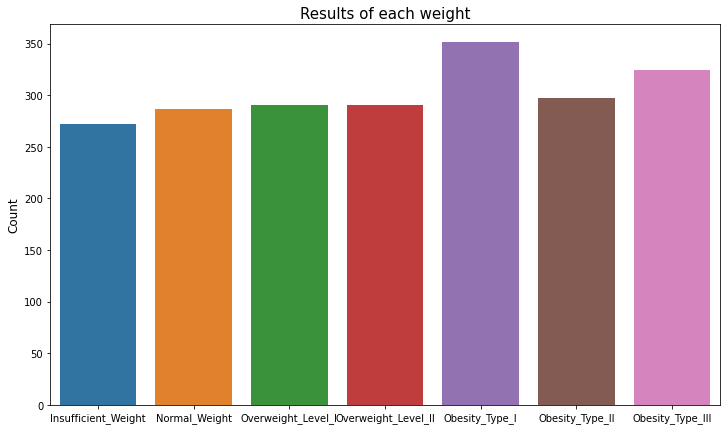

In [8]:
name = df['result'].value_counts().index
num = df['result'].value_counts().values

fig = px.pie(data_frame=df,names=name,values=num
             ,title='Pies chard show the over all result',width=800,height=600)
fig.update_traces(textposition='inside',textinfo='label+percent')
fig.show()

plt.figure(figsize=(12,7))
sns.countplot(x='result',data=df,order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Results of each weight',fontsize=15)
plt.show()

label ini terdapat 7 jenis berat badan yaitu Berat badan tidak cukup, Berat badan normal, Kegemukan tingkat I, Kegemukan tingkat II, Obesitas tipe II, dan Obesitas tipe II. Masing-masing jenis Obesitas berdistribusi cukup normal dan nilainya hampir sama (12%-16%) dan sedikit ketidakseimbangan

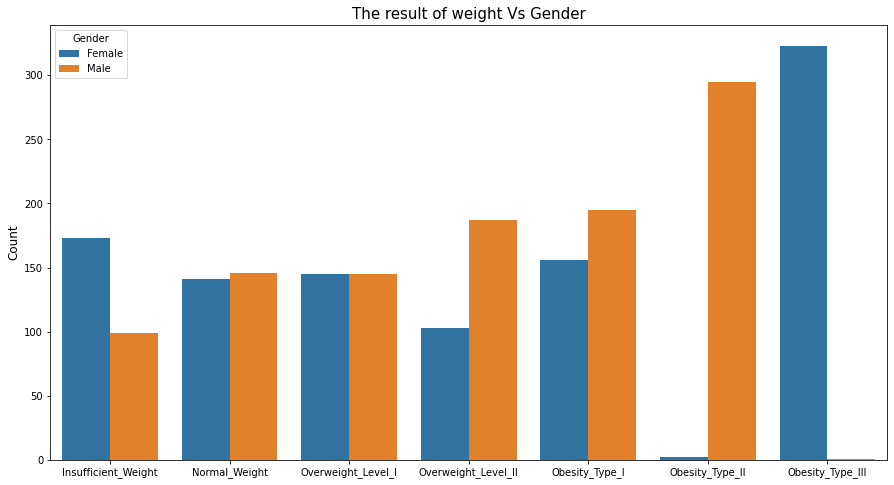

In [9]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='Gender',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.ylabel('Count',fontsize=12)
plt.xlabel(None)
plt.title('The result of weight Vs Gender',fontsize=15)
plt.show()

Ketika diklasifikasikan tingkat obesitas berdasarkan jenis kelamin ditemukan bahwa beberapa tingkat adalah super-ketidakseimbangan (Obesitas tipe II dan Obisitas tipe III)


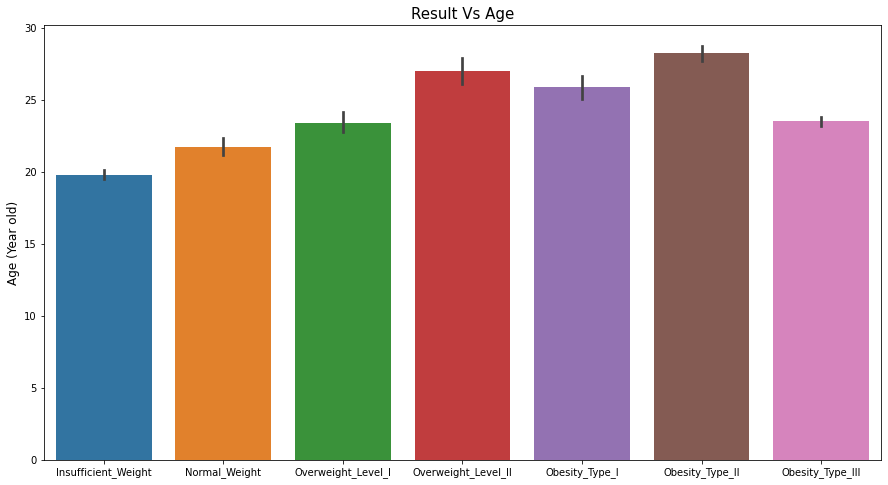

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(x='result',y='Age',data=df,order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Result Vs Age',fontsize=15)
plt.ylabel('Age (Year old)',fontsize=12)
plt.xlabel(None)
plt.show()

-Berat badan tidak mencukupi pada usia muda (19-21)
-Tingkat obesitas meningkat mengikuti usia kecuali Obesitas tipe III

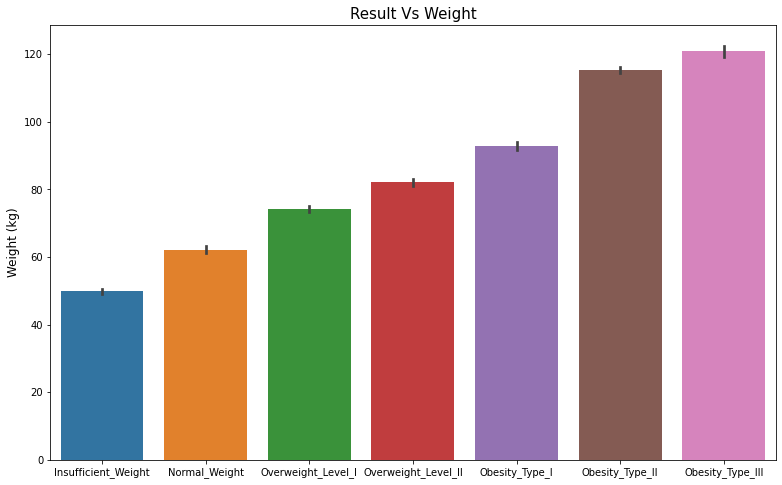

In [11]:
plt.figure(figsize=(13,8))
sns.barplot(x='result',y='Weight',data=df,
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Weight (kg)',fontsize=12)
plt.title('Result Vs Weight',fontsize=15)
plt.show()

hasil dan bobot yang masuk akal


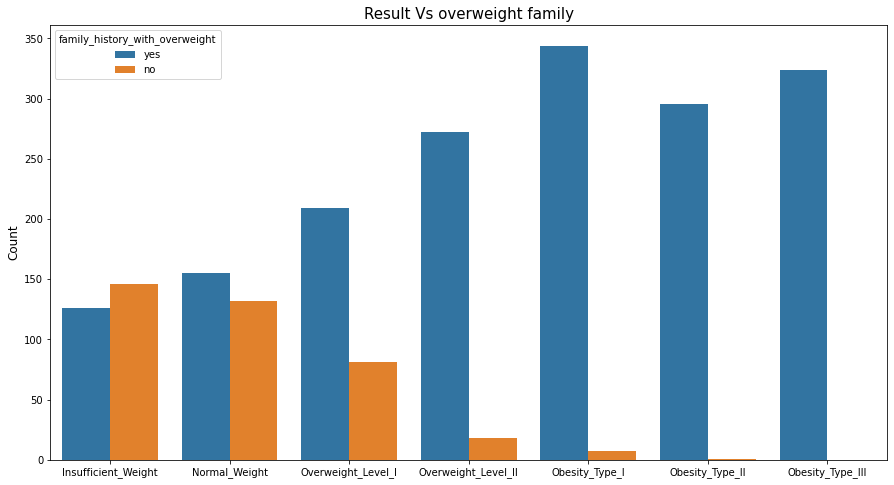

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='family_history_with_overweight',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs overweight family',fontsize=15)
plt.show()

Obesitas dalam keluarga terkena sampel


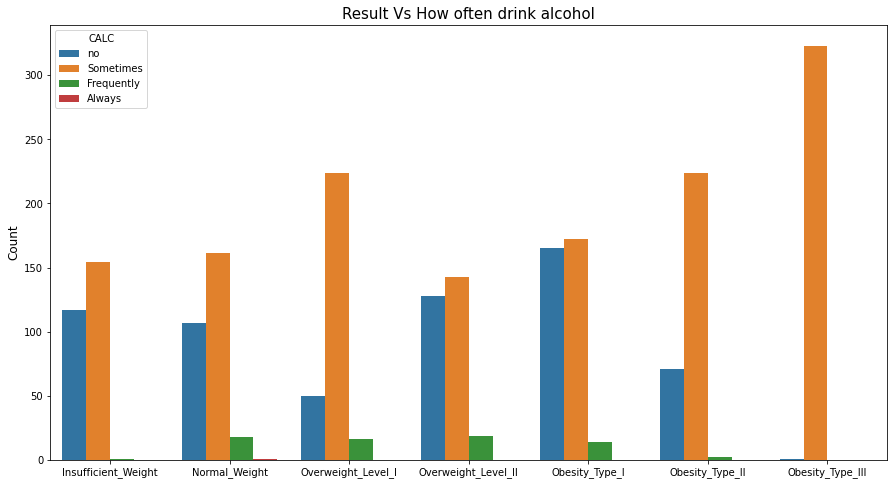

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='CALC',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs How often drink alcohol',fontsize=15)
plt.show()


yang sering minum alchol



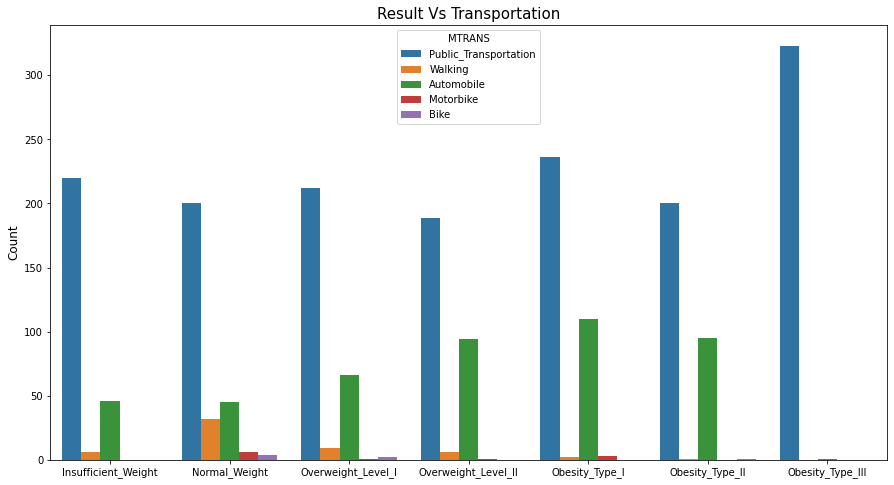

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x='result',data=df,hue='MTRANS',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Transportation',fontsize=15)
plt.show()

menggunakan transportasi


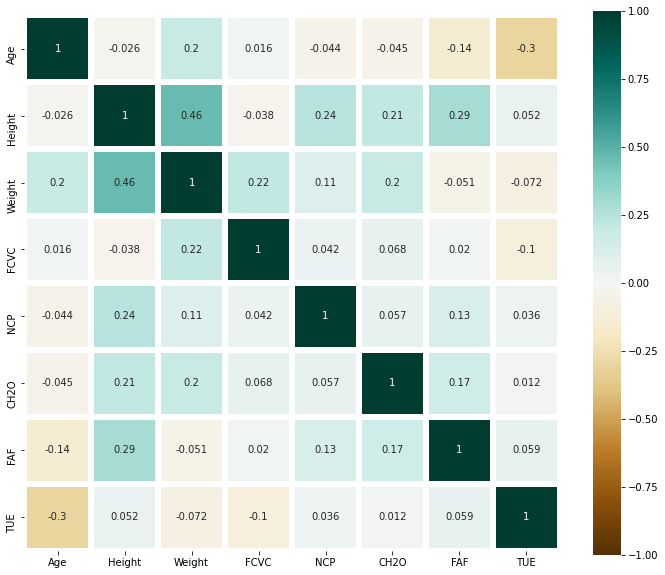

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,
            cmap='BrBG',linewidths=5)

In [21]:
data = df.copy()

feature = data.drop('result',axis=1)
answer = data['result'].values.reshape(-1)

In [27]:
le = LabelEncoder()
for column_name in feature.columns:
  if feature[column_name].dtype == object:
    feature[column_name] = le.fit_transform(feature[column_name])
  else:
    pass

answer = le.fit_transform(answer)

In [26]:
feature.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


menggunakan model decision tree


In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(feature,answer,test_size=0.3,random_state=42)

param_grid = {'criterion':['gini', 'entropy'],
              'splitter':['best','random'],
              'max_depth':list(range(1,50)),
              }

grid = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'splitter': 'best'}


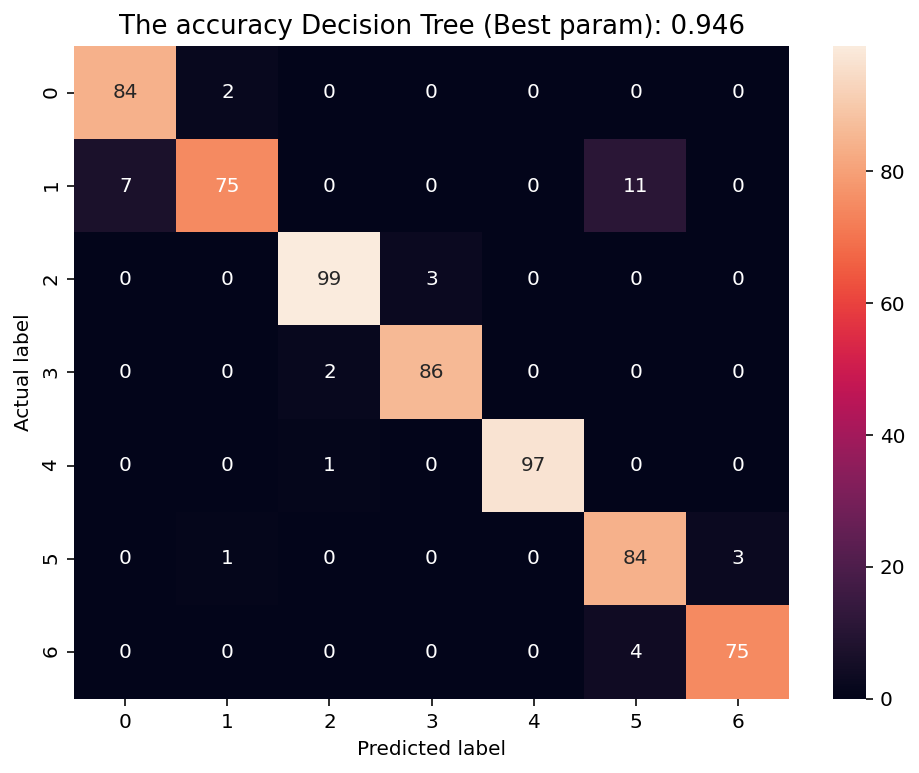

Accuracy score:  0.9463722397476341
Precision score:  0.9473598663948962
Recall:  0.9463950318624254
F1 score:  0.9453381002983285
ROC-AUC score 0.9721702010934951


In [35]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=9,splitter='best')
clf.fit(xtrain,ytrain)
y_pred = clf.predict(xtest)
y_prob = clf.predict_proba(xtest)

mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))

cm = confusion_matrix(ytest,y_pred)
cm_df = pd.DataFrame(cm,index=mapping)

plt.figure(figsize=(8,6))                  
sns.heatmap(cm_df, annot=True)
plt.title('The accuracy Decision Tree (Best param): {0:.3f}'.format(accuracy_score(ytest,y_pred)),fontsize=13)
plt.ylabel('Actual label')
plt.xlabel('Predicted label',)
plt.show()

print('Accuracy score: ', accuracy_score(ytest,y_pred))
print('Precision score: ',precision_score(ytest,y_pred,average='macro'))
print('Recall: ', recall_score(ytest,y_pred,average='macro'))
print('F1 score: ',f1_score(ytest,y_pred,average='macro'))
print('ROC-AUC score',roc_auc_score(ytest, y_prob, multi_class="ovo",
                                  average="macro"))